In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [25]:
adata_ndrop = sc.read_h5ad('data/organoid/ndrop/8980-YX-6_top2k.h5ad')
adata_pipseq = sc.read_h5ad('data/organoid/pipseq/8798-AS-3_top2k.h5ad')

In [26]:
adata_ndrop.var_names_make_unique()
adata_ndrop.obs_names_make_unique()

adata_pipseq.var_names_make_unique()
adata_pipseq.obs_names_make_unique()

In [30]:
batch_name = ['ndrop','pipseq']

In [34]:
adata_ndrop = sc.AnnData(adata_ndrop.to_df())
adata_pipseq = sc.AnnData(adata_pipseq.to_df())

In [35]:
adata = adata_ndrop.concatenate(adata_pipseq,join='inner',fill_value=0,batch_categories=batch_name)

/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [36]:
adata

AnnData object with n_obs × n_vars = 4105 × 17442
    obs: 'batch'

In [37]:
adata.write_h5ad('data/organoid/concat.h5ad',compression='gzip')

In [38]:
adata.obs['batch'].value_counts()

pipseq    2097
ndrop     2008
Name: batch, dtype: int64

In [39]:
adata.raw = adata
sc.pp.normalize_total(adata)
adata.X = np.arcsinh(adata.X).copy()
sc.pp.scale(adata)
sc.pp.pca(adata,random_state=0)
neighborhood_k = np.sqrt(adata.n_obs).astype(int) 
sc.pp.neighbors(adata,n_neighbors=neighborhood_k,use_rep='X_pca',random_state=0)
sc.tl.umap(adata,min_dist=0.25,random_state=0)
sc.tl.leiden(adata,resolution=2,random_state=0)

/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


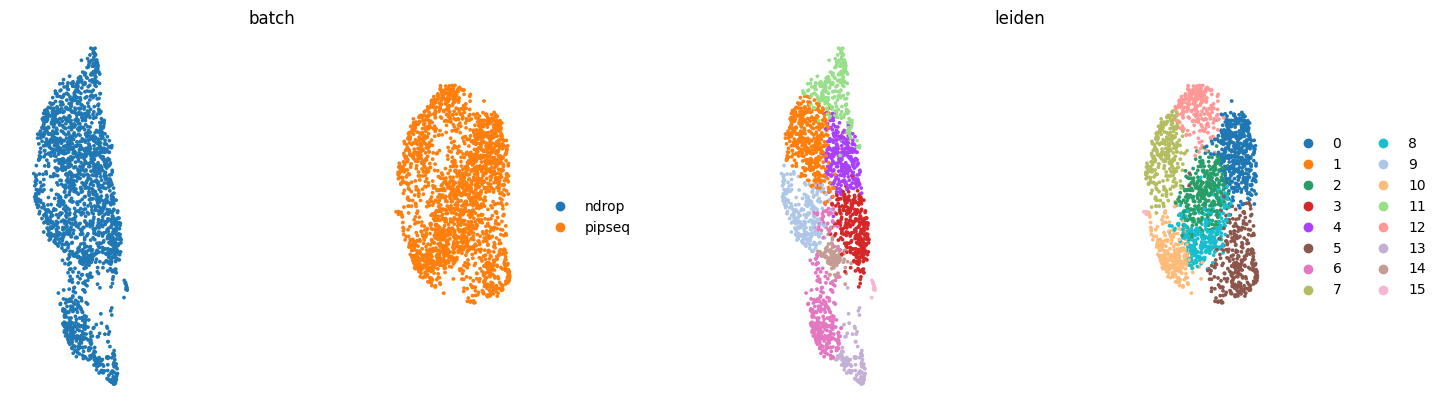

In [40]:
sc.pl.umap(adata,color=['batch','leiden'],legend_fontoutline=True,legend_fontsize=10,cmap='viridis',ncols=3,save='batch.png',wspace=0.3,frameon=False)